# 📝 Analisis Sentimen Twitter tentang Palestina



---


### 🔐 Mengatur Kredensial API  

Pada bagian ini, kita menyimpan kredensial API yang diperlukan untuk mengakses layanan Twitter. **Pastikan untuk tidak membagikan kredensial ini secara publik!**  

In [121]:
CLIENT_ID = "YOUR_CLIENT_ID"
CLIENT_SECRET = "YOUR_CLIENT_SECRET"
BEARER_TOKEN = "YOUR_BEARER_TOKEN"

### 🔍 Mengambil Data Tweet dengan Twitter API  

Pada bagian ini, kita menggunakan **Twitter API v2** untuk mencari tweet berdasarkan kata kunci tertentu. Hasilnya kemudian disimpan dalam file JSON untuk analisis lebih lanjut.  

#### 📌 Langkah-langkah:  
1. **Konfigurasi API**  
   - Menentukan endpoint pencarian (`SEARCH_URL`).  
   - Mengatur **Bearer Token** untuk otorisasi.  

2. **Fungsi Pencarian Tweet**  
   - Mengirim permintaan ke Twitter API dengan parameter pencarian.  
   - Mengambil metadata tambahan seperti **waktu dibuat, teks, bahasa, metrik engagement, dan informasi pengguna**.  
   - Menangani kemungkinan error dari respons API.  

3. **Menyimpan Hasil ke JSON**  
   - Jika pengambilan data berhasil, tweet akan disimpan dalam file `tweets_data.json`.  
   - Jika gagal, pesan error akan ditampilkan.  

💡 **Catatan:**  
- **`max_results`** harus berada di antara **10 hingga 100** sesuai dengan batas API.  
- Untuk dataset yang lebih besar, gunakan **pagination** dengan parameter `next_token`.  
- Pastikan kamu memiliki kredensial API yang valid agar bisa mengakses data. 🚀  


In [122]:
import requests
import json

# Konfigurasi API
SEARCH_URL = "https://api.twitter.com/2/tweets/search/recent"

# Fungsi untuk mencari tweet
def search_tweets(query, max_results=10):
    headers = {"Authorization": f"Bearer {BEARER_TOKEN}"}
    params = {
        "query": query,
        "max_results": max_results,  # Harus di antara 10 - 100
        "tweet.fields": "created_at,text,lang,public_metrics,source,author_id,context_annotations,entities",
        "expansions": "author_id",
        "user.fields": "username,name,verified,public_metrics"
    }

    response = requests.get(SEARCH_URL, headers=headers, params=params)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error {response.status_code}: {response.text}")
        return None

# Contoh penggunaan
query = "Palestine"
max_results = 100
tweets_data = search_tweets(query, max_results)

# Simpan ke file JSON jika berhasil
if tweets_data:
    with open("tweets_data.json", "w", encoding="utf-8") as f:
        json.dump(tweets_data, f, ensure_ascii=False, indent=4)
    print("Data berhasil disimpan ke tweets_data.json")
else:
    print("Gagal mengambil data.")



### 📊 Memuat Data Tweet ke dalam DataFrame  

Setelah berhasil mengambil data dari Twitter API, langkah selanjutnya adalah **memuat data JSON ke dalam Pandas DataFrame** agar lebih mudah dianalisis.  

#### 📌 Langkah-langkah:  
1. **Membuka File JSON**  
   - Data yang diperoleh dari Twitter API disimpan dalam file `tweets_data.json`.  
   - File ini dibuka dan dimuat menggunakan modul `json`.  

2. **Ekstraksi Data**  
   - Twitter API menyimpan hasil dalam format JSON dengan berbagai metadata.  
   - Kita hanya mengambil bagian **"data"**, yang berisi daftar tweet.  

3. **Konversi ke DataFrame**  
   - Data yang telah diekstrak dikonversi menjadi Pandas DataFrame agar lebih mudah diolah.  
   - Menampilkan 5 baris pertama untuk melihat struktur data.  

💡 **Catatan:**  
- Pastikan bahwa file JSON tersedia di lokasi yang benar sebelum dijalankan.  
- DataFrame ini masih mentah dan perlu diproses lebih lanjut sebelum dianalisis. 🚀  


In [123]:
import pandas as pd
import json

# Load data tweet dari file JSON
# Load file JSON
tweets_file = "/content/tweets_data.json"

with open(tweets_file, 'r') as f:
    data = json.load(f)  # Load JSON

# Ambil hanya bagian 'data'
df = pd.DataFrame(data['data'])

display(df.head(5))

,entities,created_at,public_metrics,id,author_id,lang,edit_history_tweet_ids,text,context_annotations
0,"{'urls': [{'start': 120, 'end': 139, 'url': 'h...",2025-04-08T03:45:21.000Z,"{'retweet_count': 194, 'reply_count': 0, 'like...",1909452479802101902,1175575729708269568,en,[1909452479802101902],RT @WOLPalestine: ‼️SHUT IT DOWN‼️\nPRO PALEST...,NaN
1,"{'mentions': [{'start': 3, 'end': 16, 'usernam...",2025-04-08T03:45:21.000Z,"{'retweet_count': 254, 'reply_count': 0, 'like...",1909452477444858120,741875717617651712,fr,[1909452477444858120],RT @Miminouche17: Et pour la Palestine ? Ou c'...,"[{'domain': {'id': '131', 'name': 'Unified Twi..."
2,"{'mentions': [{'start': 3, 'end': 18, 'usernam...",2025-04-08T03:45:21.000Z,"{'retweet_count': 441, 'reply_count': 0, 'like...",1909452477394763912,1479797795087273984,en,[1909452477394763912],RT @NerdeenKiswani: Gaza said: Stop the world ...,"[{'domain': {'id': '88', 'name': 'Political Bo..."
3,"{'mentions': [{'start': 3, 'end': 14, 'usernam...",2025-04-08T03:45:20.000Z,"{'retweet_count': 7454, 'reply_count': 0, 'lik...",1909452473799958942,1475092464759414790,en,[1909452473799958942],RT @IAJT1210_2: The woman that has been showin...,"[{'domain': {'id': '156', 'name': 'Cities', 'd..."
4,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",2025-04-08T03:45:20.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1909452472927613172,1891551373600358404,tl,[1909452472927613172],@AsadUllahQA @SenatorMushtaq Blochistan bi arm...,NaN


### 📊 Memisahkan Public Metrics ke Kolom Terpisah  

Twitter API menyimpan data interaksi (retweet, like, reply, quote) dalam satu kolom **public_metrics** berbentuk dictionary.  
Agar lebih mudah dianalisis, kita mengekstraknya ke dalam kolom terpisah:  

✅ **Membuat Kolom Baru:**  
- **retweet_count** → Jumlah retweet  
- **reply_count** → Jumlah balasan  
- **like_count** → Jumlah likes  
- **quote_count** → Jumlah kutipan  

✅ **Membersihkan Data:**  
- Menghapus kolom **public_metrics** setelah ekstraksi  
- Menyimpan hasil ke **"data_tweets_cleaned.csv"**  

💡 **Tujuan:** Mempermudah analisis engagement pada tweet. 🚀  


In [124]:
# Pisahkan public_metrics jadi kolom individual
df["retweet_count"] = df["public_metrics"].apply(lambda x: x.get("retweet_count", 0) if isinstance(x, dict) else 0)
df["reply_count"] = df["public_metrics"].apply(lambda x: x.get("reply_count", 0) if isinstance(x, dict) else 0)
df["like_count"] = df["public_metrics"].apply(lambda x: x.get("like_count", 0) if isinstance(x, dict) else 0)
df["quote_count"] = df["public_metrics"].apply(lambda x: x.get("quote_count", 0) if isinstance(x, dict) else 0)

# Hapus kolom asli untuk kebersihan
df.drop(columns=["public_metrics"], inplace=True)
df.to_csv("data_tweets_cleaned.csv", index=False)

### 🧼 Preprocessing Teks untuk Analisis Sentimen  

Agar analisis sentimen lebih akurat, kita membersihkan teks tweet dengan beberapa langkah:  

✅ **Langkah Pembersihan:**  
1. **Lowercasing** → Mengubah teks menjadi huruf kecil  
2. **Menghapus URL** → Menghilangkan link yang tidak relevan  
3. **Menghapus Mention & Hashtag** → Membersihkan username dan tagar  
4. **Menghapus Tanda Baca** → Menghilangkan simbol yang tidak perlu  
5. **Menghapus Angka** → Mengurangi gangguan dari angka yang tidak bermakna  
6. **Menghapus Spasi Berlebih** → Merapikan teks  

💡 **Tujuan:**  
- Menstandarkan teks agar mudah diproses oleh model NLP  
- Meningkatkan akurasi dalam analisis sentimen 🚀  


In [125]:
# Import library untuk preprocessing
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords jika belum ada
nltk.download("stopwords")

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = str(text).lower()  # Ubah ke huruf kecil
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Hapus URL
    text = re.sub(r"\@w+|\#", "", text)  # Hapus mention dan hashtag
    text = re.sub(r"[^\w\s]", "", text)  # Hapus tanda baca
    text = re.sub(r"\d+", "", text)  # Hapus angka
    text = text.strip()  # Hapus spasi berlebih
    return text

# Terapkan fungsi ke dataset
df["clean_text"] = df["text"].apply(clean_text)

# Cek hasil
df[["text", "clean_text"]].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_text
0,RT @WOLPalestine: ‼️SHUT IT DOWN‼️\nPRO PALEST...,rt olpalestine shut it down\npro palestine pro...
1,RT @Miminouche17: Et pour la Palestine ? Ou c'...,rt miminouche et pour la palestine ou cest tr...
2,RT @NerdeenKiswani: Gaza said: Stop the world ...,rt nerdeenkiswani gaza said stop the world for...
3,RT @IAJT1210_2: The woman that has been showin...,rt iajt_ the woman that has been showing throa...
4,@AsadUllahQA @SenatorMushtaq Blochistan bi arm...,asadullahqa senatormushtaq blochistan bi army ...


### 🔍 Analisis Sentimen dengan Model Transformer  

Kita menggunakan model **`cardiffnlp/twitter-roberta-base-sentiment`** untuk menganalisis sentimen teks dari tweet.  

✅ **Langkah-langkah:**  
1. **Menggunakan Model RoBERTa** → Model ini sudah dilatih khusus untuk analisis sentimen pada data Twitter.  
2. **Memprediksi Sentimen** → Untuk setiap teks, model akan mengklasifikasikan sentimen ke dalam:  
   - `LABEL_0` → Sentimen negatif  
   - `LABEL_1` → Sentimen netral  
   - `LABEL_2` → Sentimen positif  
3. **Menghitung Confidence Score** → Model juga memberikan nilai probabilitas sebagai tingkat kepercayaan terhadap hasil sentimen.  

💡 **Tujuan:**  
- Memahami persepsi pengguna terhadap topik tertentu  
- Menentukan apakah tweet cenderung positif, netral, atau negatif 📊  


In [126]:
# Import library untuk analisis sentimen
from transformers import pipeline

# Load model analisis sentimen
sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Fungsi untuk mendapatkan sentimen
def get_sentiment(text):
    result = sentiment_model(text)[0]
    return result["label"], result["score"]

# Terapkan ke dataset
df[["sentiment", "sentiment_score"]] = df["clean_text"].apply(lambda x: pd.Series(get_sentiment(x)))

# Tampilkan hasil
df.head()


Device set to use cpu


,entities,created_at,id,author_id,lang,edit_history_tweet_ids,text,context_annotations,retweet_count,reply_count,like_count,quote_count,clean_text,sentiment,sentiment_score
0,"{'urls': [{'start': 120, 'end': 139, 'url': 'h...",2025-04-08T03:45:21.000Z,1909452479802101902,1175575729708269568,en,[1909452479802101902],RT @WOLPalestine: ‼️SHUT IT DOWN‼️\nPRO PALEST...,NaN,194,0,0,0,rt olpalestine shut it down\npro palestine pro...,LABEL_0,0.668997
1,"{'mentions': [{'start': 3, 'end': 16, 'usernam...",2025-04-08T03:45:21.000Z,1909452477444858120,741875717617651712,fr,[1909452477444858120],RT @Miminouche17: Et pour la Palestine ? Ou c'...,"[{'domain': {'id': '131', 'name': 'Unified Twi...",254,0,0,0,rt miminouche et pour la palestine ou cest tr...,LABEL_1,0.800252
2,"{'mentions': [{'start': 3, 'end': 18, 'usernam...",2025-04-08T03:45:21.000Z,1909452477394763912,1479797795087273984,en,[1909452477394763912],RT @NerdeenKiswani: Gaza said: Stop the world ...,"[{'domain': {'id': '88', 'name': 'Political Bo...",441,0,0,0,rt nerdeenkiswani gaza said stop the world for...,LABEL_0,0.713456
3,"{'mentions': [{'start': 3, 'end': 14, 'usernam...",2025-04-08T03:45:20.000Z,1909452473799958942,1475092464759414790,en,[1909452473799958942],RT @IAJT1210_2: The woman that has been showin...,"[{'domain': {'id': '156', 'name': 'Cities', 'd...",7454,0,0,0,rt iajt_ the woman that has been showing throa...,LABEL_1,0.677772
4,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",2025-04-08T03:45:20.000Z,1909452472927613172,1891551373600358404,tl,[1909452472927613172],@AsadUllahQA @SenatorMushtaq Blochistan bi arm...,NaN,0,0,0,0,asadullahqa senatormushtaq blochistan bi army ...,LABEL_1,0.712694


### 📊 Visualisasi Distribusi Sentimen  

🔹 **Apa yang dilakukan?**  
- Menghitung jumlah tweet berdasarkan kategori sentimen (`negatif`, `netral`, `positif`).  
- Membuat visualisasi dengan **bar chart** untuk menunjukkan distribusi sentimen.  

🔹 **Tujuan:**  
- Memahami bagaimana sentimen terbagi dalam dataset.  
- Mengetahui apakah mayoritas tweet bersifat **positif, netral, atau negatif** terhadap topik yang dianalisis.  

📌 **Hasil:**  
- Sentimen dengan jumlah tweet terbanyak akan terlihat lebih dominan pada grafik.  
- Memberikan gambaran umum tentang bagaimana pengguna merespons suatu isu.  


<ipython-input-127-83ce3e967fc8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


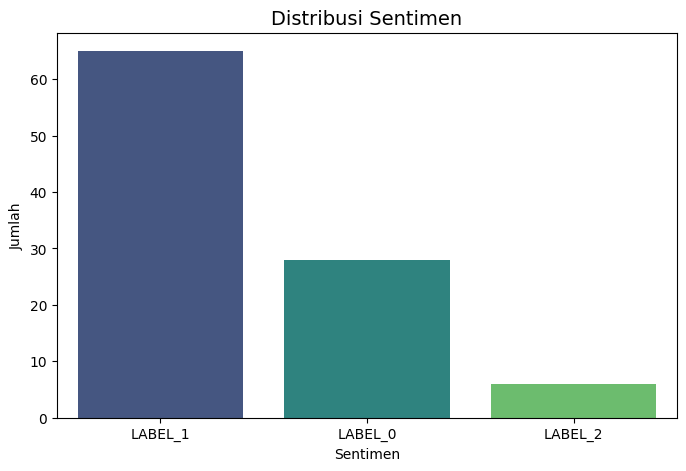

In [127]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Hitung distribusi sentimen
sentiment_counts = df["sentiment"].value_counts()

# Plot distribusi sentimen
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribusi Sentimen", fontsize=14)
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()


### ☁️ Word Cloud untuk Sentimen Positif & Negatif  

🔹 **Apa yang dilakukan?**  
- Menggabungkan semua tweet dengan **sentimen positif** ke dalam satu teks.  
- Menggabungkan semua tweet dengan **sentimen negatif** ke dalam satu teks.  
- Membuat **Word Cloud** untuk melihat kata-kata yang paling sering muncul dalam setiap kategori sentimen.  

🔹 **Tujuan:**  
- Mengidentifikasi kata-kata kunci yang sering digunakan dalam tweet **positif** dan **negatif**.  
- Memberikan wawasan tentang bagaimana orang bereaksi terhadap suatu topik berdasarkan kata-kata yang sering mereka gunakan.  

📌 **Hasil:**  
- **Word Cloud Sentimen Positif** menunjukkan kata-kata yang sering muncul dalam tweet positif.  
- **Word Cloud Sentimen Negatif** menunjukkan kata-kata yang sering muncul dalam tweet negatif.  


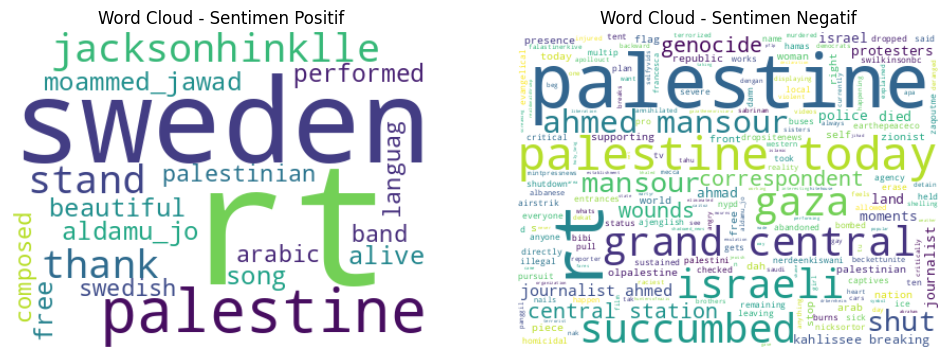

In [128]:
# Pisahkan tweet berdasarkan sentimen
positive_tweets = " ".join(df[df["sentiment"] == "LABEL_2"]["clean_text"])
negative_tweets = " ".join(df[df["sentiment"] == "LABEL_0"]["clean_text"])

# Word Cloud untuk Sentimen Positif
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=400, height=300, background_color="white").generate(positive_tweets)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Sentimen Positif")

# Word Cloud untuk Sentimen Negatif
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=400, height=300, background_color="white").generate(negative_tweets)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Sentimen Negatif")

plt.show()


In [129]:
df.to_csv("tweets_sentiment_cleaned.csv", index=False)
print("✅ Hasil akhir disimpan di: tweets_sentiment_cleaned.csv")

✅ Hasil akhir disimpan di: tweets_sentiment_cleaned.csv


### 📊 Menghitung **Engagement Score**  

🔹 **Apa yang dilakukan?**  
- Menentukan **bobot** untuk setiap jenis engagement:  
  - **Retweet** diberikan bobot **lebih tinggi** (alpha = 2) karena menunjukkan penyebaran konten.  
  - **Like** diberikan bobot **lebih rendah** (beta = 1) karena hanya menunjukkan apresiasi.  
- Menghitung **Engagement Score** dengan rumus:  
  \[
  \text{engagement\_score} = (\alpha \times \text{retweet\_count}) + (\beta \times \text{like\_count})
  \]

🔹 **Tujuan:**  
- Menentukan **seberapa viral** atau **berpengaruhnya** suatu tweet berdasarkan interaksi yang diterima.  


In [130]:
# Menentukan bobot untuk engagement score
alpha = 2  # Bobot untuk retweet
beta = 1   # Bobot untuk like

# Membuat kolom engagement_score
df['engagement_score'] = alpha * df['retweet_count'] + beta * df['like_count']


### 📊 Rata-rata **Engagement Score** Berdasarkan Sentimen  

🔹 **Apa yang dilakukan?**  
- Mengelompokkan data berdasarkan **kategori sentimen** (`sentiment`).  
- Menghitung **rata-rata** dari **engagement score** dalam setiap kelompok.  
- Mengurutkan hasilnya secara **descending** (dari nilai tertinggi ke terendah).  

🔹 **Tujuan:**  
- Mengetahui **kategori sentimen mana** yang memiliki engagement tertinggi.  
- Menganalisis apakah **tweet dengan sentimen tertentu** (positif/negatif/netral) cenderung mendapat lebih banyak interaksi.  


In [131]:
df.groupby('sentiment')['engagement_score'].mean().sort_values(ascending=False)


,engagement_score
sentiment,
LABEL_2,8198.666667
LABEL_1,3201.784615
LABEL_0,1083.500000


### 📊 Visualisasi **Distribusi Engagement Score Berdasarkan Sentimen**  

🔹 **Apa yang dilakukan?**  
- Membuat **boxplot** untuk melihat distribusi **engagement score** dalam setiap kategori **sentimen**.  
- Sumbu **X**: Kategori **sentimen** (Positif, Netral, Negatif).  
- Sumbu **Y**: Nilai **engagement score**.  

🔹 **Tujuan:**  
- Mengetahui bagaimana engagement tersebar dalam setiap kelompok sentimen.  
- Melihat **median**, **outlier**, dan **variabilitas** engagement di tiap kategori sentimen.  


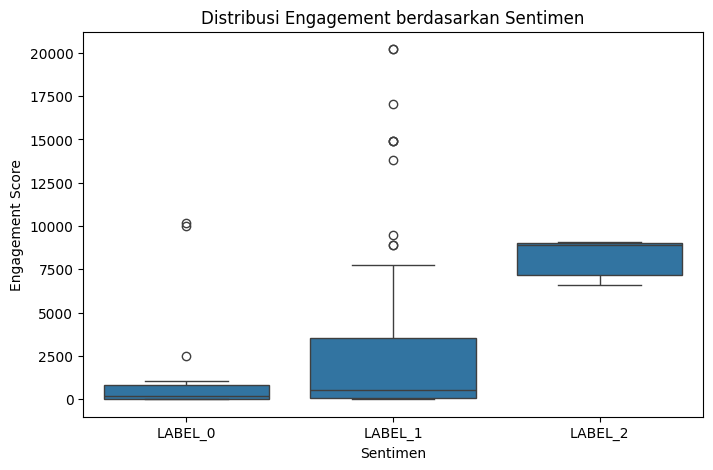

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['sentiment'], y=df['engagement_score'])
plt.title("Distribusi Engagement berdasarkan Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Engagement Score")
plt.show()


### 🧪 **Uji Kruskal-Wallis: Apakah Engagement Berbeda Signifikan antar Sentimen?**  

🔹 **Apa yang dilakukan?**  
- Menggunakan **Uji Kruskal-Wallis**, yaitu uji statistik non-parametrik untuk membandingkan **engagement score** antara kelompok **sentimen**.  
- Data engagement dibagi berdasarkan **LABEL_0** (Negatif), **LABEL_1** (Netral), dan **LABEL_2** (Positif).  

🔹 **Interpretasi Hasil:**  
- **p-value < 0.05** → Ada perbedaan signifikan dalam engagement antara kelompok sentimen.  
- **p-value ≥ 0.05** → Tidak ada perbedaan signifikan dalam engagement antar kelompok sentimen.  


In [133]:
from scipy.stats import kruskal

# Membagi data berdasarkan sentimen
eng_label_0 = df[df["sentiment"] == "LABEL_0"]["engagement_score"]
eng_label_1 = df[df["sentiment"] == "LABEL_1"]["engagement_score"]
eng_label_2 = df[df["sentiment"] == "LABEL_2"]["engagement_score"]

# Uji Kruskal-Wallis
stat, p = kruskal(eng_label_0, eng_label_1, eng_label_2)
print(f"Hasil Uji Kruskal-Wallis: Statistik={stat}, p-value={p}")

if p < 0.05:
    print("Ada perbedaan signifikan dalam engagement antara kelompok sentimen.")
else:
    print("Tidak ada perbedaan signifikan dalam engagement antara kelompok sentimen.")


Hasil Uji Kruskal-Wallis: Statistik=13.904798991872099, p-value=0.0009563376700422491
Ada perbedaan signifikan dalam engagement antara kelompok sentimen.


### 📊 **Uji Dunn untuk Perbandingan Pasangan Sentimen**  

🔹 **Apa yang dilakukan?**  
- Menggunakan **Uji Dunn** sebagai analisis post-hoc setelah **Uji Kruskal-Wallis** untuk mengetahui **pasangan kelompok sentimen mana yang memiliki perbedaan signifikan dalam engagement score**.  
- Menggunakan **Bonferroni correction** untuk menyesuaikan p-value agar menghindari kesalahan akibat multiple comparisons.  

🔹 **Interpretasi Hasil:**  
- **p-value < 0.05** → Perbedaan engagement antara dua kelompok sentimen signifikan.  
- **p-value ≥ 0.05** → Tidak ada perbedaan signifikan antara dua kelompok sentimen tersebut.  


In [134]:
# from scipy.stats import mannwhitneyu
# !pip install scikit_posthocs
import scikit_posthocs as sp


# Dunn's test dengan Bonferroni correction
dunn_results = sp.posthoc_dunn([eng_label_0, eng_label_1, eng_label_2], p_adjust='bonferroni')

print(dunn_results)


          1         2         3
1  1.000000  0.087168  0.000965
2  0.087168  1.000000  0.025133
3  0.000965  0.025133  1.000000


### 🔗 **Analisis Korelasi Spearman antara Engagement dan Sentimen**  

🔹 **Apa yang dilakukan?**  
- Menggunakan **Korelasi Spearman** untuk mengukur hubungan antara **engagement score** dan **sentimen**.  
- **Sentimen dikonversi menjadi nilai numerik**:  
  - `LABEL_0` (Negatif) → 0  
  - `LABEL_1` (Netral) → 1  
  - `LABEL_2` (Positif) → 2  

🔹 **Interpretasi Hasil:**  
- **Koefisien korelasi positif** → Engagement cenderung lebih tinggi untuk sentimen positif.  
- **Koefisien korelasi negatif** → Engagement lebih tinggi untuk sentimen negatif.  
- **p-value < 0.05** → Hubungan signifikan secara statistik.  
- **p-value ≥ 0.05** → Tidak ada hubungan signifikan.  


In [135]:
from scipy.stats import spearmanr

# Konversi sentimen ke angka
sentiment_mapping = {"LABEL_0": 0, "LABEL_1": 1, "LABEL_2": 2}
df["sentiment_score"] = df["sentiment"].map(sentiment_mapping)

# Korelasi Spearman
correlation, p_value = spearmanr(df["engagement_score"], df["sentiment_score"])
print(f"Korelasi Spearman: {correlation}, p-value: {p_value}")


Korelasi Spearman: 0.34294339658476924, p-value: 0.0005110181856396155


### 📊 **Scatter Plot: Engagement vs Sentimen**  

#### 🔹 **Tujuan**  
- Menampilkan hubungan antara **engagement score** (retweet & like) dan **sentimen tweet**.  
- Memvisualisasikan pola distribusi dan korelasi antara kedua variabel.  

#### 🔹 **Interpretasi Grafik**  
- **Tersebar tanpa pola jelas** → Tidak ada hubungan kuat antara engagement dan sentimen.  
- **Pola naik** → Engagement lebih tinggi pada tweet dengan sentimen positif.  
- **Pola turun** → Engagement lebih tinggi pada tweet dengan sentimen negatif.  
- **Titik saling tumpang tindih** → Bisa menunjukkan distribusi acak tanpa hubungan signifikan.  

#### 🔹 **Fitur Visualisasi**  
- **Titik transparan (`alpha=0.5`)** untuk menghindari tumpang tindih berlebihan.  
- **Sumbu X**: Engagement Score (jumlah retweet & like).  
- **Sumbu Y**: Sentiment Score (0 = negatif, 1 = netral, 2 = positif).  


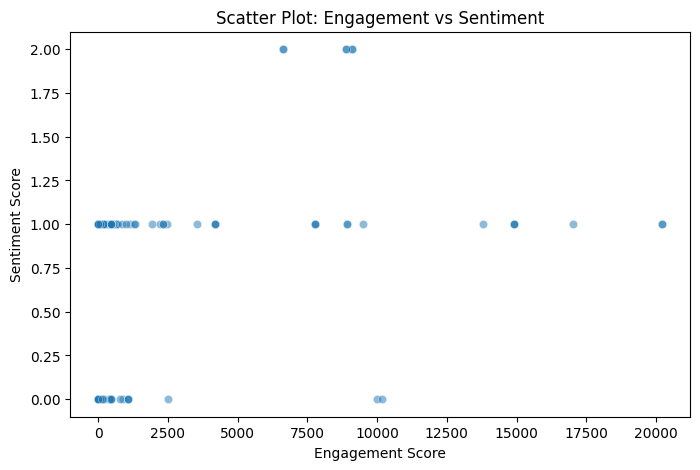

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['engagement_score'], y=df['sentiment_score'], alpha=0.5)
plt.xlabel("Engagement Score")
plt.ylabel("Sentiment Score")
plt.title("Scatter Plot: Engagement vs Sentiment")
plt.show()


### 📈 **Regresi Linear: Engagement vs Sentimen**  

#### 🔹 **Tujuan**  
- Menguji apakah **engagement score** (retweet & like) dapat memprediksi **sentimen tweet**.  
- Menentukan seberapa kuat hubungan antara kedua variabel dengan **regresi linear**.  

#### 🔹 **Proses Analisis**  
1. **Variabel independen (X)** → Engagement Score.  
2. **Variabel dependen (y)** → Sentiment Score (0 = negatif, 1 = netral, 2 = positif).  
3. **Model** → Ordinary Least Squares (OLS) untuk analisis regresi.  
4. **Menambahkan konstanta** agar regresi memiliki intercept.  

#### 🔹 **Interpretasi Output**  
- **Koefisien engagement score**:  
  - Positif → Engagement meningkatkan skor sentimen.  
  - Negatif → Engagement menurunkan skor sentimen.  
- **R-squared (R²)**: Menunjukkan seberapa baik engagement menjelaskan variasi dalam sentimen.  
- **P-value**:  
  - **< 0.05** → Hubungan signifikan antara engagement dan sentimen.  
  - **> 0.05** → Tidak ada hubungan signifikan.  

#### 🔹 **Kesimpulan**  
- Jika model memiliki **R² rendah**, berarti engagement tidak terlalu berpengaruh pada sentimen.  
- Jika koefisien engagement **tidak signifikan**, ada faktor lain yang lebih dominan dalam menentukan sentimen tweet.  


In [137]:
import statsmodels.api as sm

X = df[['engagement_score']]
y = df['sentiment_score']
X = sm.add_constant(X)  # Tambah konstanta untuk regresi
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        sentiment_score   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     11.13
Date:                Tue, 08 Apr 2025   Prob (F-statistic):            0.00120
Time:                        14:41:00   Log-Likelihood:                -74.509
No. Observations:                  99   AIC:                             153.0
Df Residuals:                      97   BIC:                             158.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6726      0.061  